# Chapter 8. 이미지 분류

## [실습 1] MNIST 손글씨 이미지 데이터셋 (10가지 숫자에 대한 60,000개의 28x28 그레이 스케일 이미지) 분류하기

### [Experiment Setting]

-   데이터셋 <br>
  Keras에서 Mnist 데이터셋 불러와 input data로는 28x28 픽셀의 손글씨 이미지, y 데이터로는 이미지 분류에 사용되는 0 ~ 9사이의 레이블 값 사용함.
 <BR> 따라서 0 ~ 255.0 사이의 값을 갖는 픽셀값들을 0 ~ 1.0 사이의 값을 갖도록 변환해야함

- **모델 구성**
  1. Input layer: Flatten() 을 사용해서 28x28 픽셀 값을 1차원 배열로 변환
  2. hidden layer와 output layer의 활성화 함수는 각각 ReLU 와 Softmax를 사용

- **모델 컴파일 및 평가 지표** <br>
   손실함수는 sparse_catagorical_crossentropy로 지정하고, optimizer는 Adam, 평가지표로는 accuracy를 사용함. 여기에서 정확도는 이미지 중 올바르게 분류한 비율을 의미함.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten

#### 1. 데이터 생성

In [ ]:
# Keras 내장 데이터셋 - Mnist 데이터셋 불러온 뒤, train, test 데이터 분리
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# 데이터 정규화

x_train, x_test = x_train/255.0, x_test/255.0

#### 2. 모델 정의

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 3.모델 컴파일 & 훈련

In [ ]:
# 모델 컴파일

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2600 - accuracy: 0.9265 - val_loss: 0.1340 - val_accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1145 - accuracy: 0.9663 - val_loss: 0.1012 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0795 - accuracy: 0.9757 - val_loss: 0.0841 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0783 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0817 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0813 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0741 - val_accu

#### 4. 모델 평가

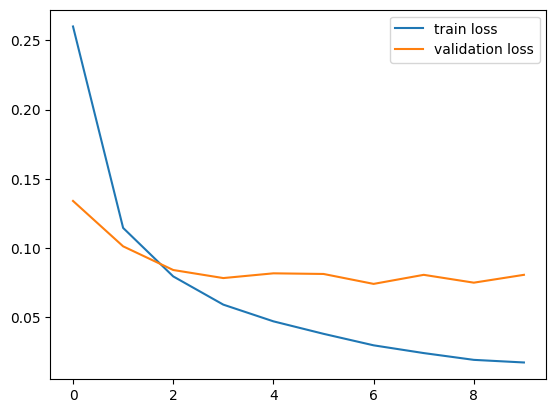

In [ ]:
# training, validation loss 평가
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['train loss', 'validation loss'])
plt.show()

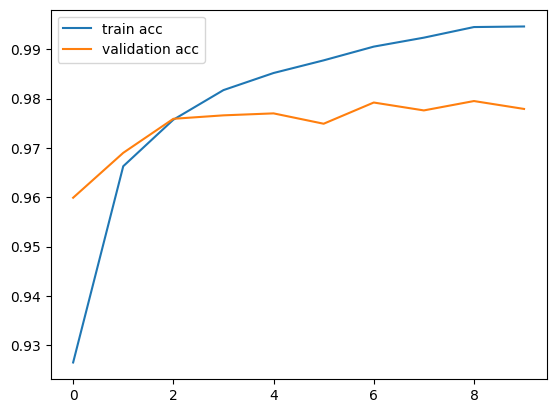

In [ ]:
# training, validation accuracy 평가
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['train acc', 'validation acc'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9779
테스트 정확도: 0.9779000282287598




## [결과 분석]
- 에포크에 따른 training, validation loss 값을 시각화한 결과, <br>
  training loss는 약 0.01, validation loss는 약 0.09로 감소. <br>
  -> training loss에 비해  validation loss 값이 근소하게 더 높게 측정됨.

- 에포크에 따른 training, validation accuracy 값을 시각화한 결과, <br>
  training accuracy는 99.5%, validation accuracy는 97.5% 의 정확도를 가짐.<br>
  -> training accuracy, validation accuracy 모두 97% 이상으로 매우 높게 측정되었지만, training accuracy에 비해  validation accuracy는 낮게 측정됨.

- test data로 evaluation을 진행한 결과, 10번의 에포크 학습을 통해서 hidden layer가 1개이 간단한 모델로도 97.71%의 정확도로 MNIST 이미지를 분류함.

## [실습 2] Fashion MNIST 데이터셋 분류하기

### [Experiment Setting]

- 데이터셋 <br>
  Keras에서 Fashion Mnist 데이터셋 불러와 input data로는 28x28 픽셀의 손글씨 이미지, y 데이터로는 이미지 분류에 사용되는 0 ~ 9사이의 레이블 값 사용함.<br>
  (0: T-shirt/top, 1: Trouser, 2:Pullover, 3:Dress, 4:Coat, 5:Sandal, 6:Shirt, 7:Sneaker, 8:Bag, 9:Ankel boot)
 <BR> 따라서 0 ~ 255.0 사이의 값을 갖는 픽셀값들을 0 ~ 1.0 사이의 값을 갖도록 변환해야함

- **모델 구성**
  1. Input layer: Flatten() 을 사용해서 28x28 픽셀 값을 1차원 배열로 변환
  2. hidden layer와 output layer의 활성화 함수는 각각 ReLU 와 Softmax를 사용

- **모델 컴파일 및 평가 지표** <br>
   손실함수는 sparse_catagorical_crossentropy로 지정하고, optimizer는 Adam, 평가지표로는 accuracy를 사용함. 여기에서 정확도는 이미지 중 올바르게 분류한 비율을 의미함.

In [ ]:
# Keras 내장 데이터셋 - Fashion MNIST 데이터셋

fashion = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion.load_data()

# 정규화

x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# 모델 정의
model1 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax'),
])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 컴파일

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련

hist1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5003 - accuracy: 0.8241 - val_loss: 0.4352 - val_accuracy: 0.8417
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3739 - accuracy: 0.8658 - val_loss: 0.3849 - val_accuracy: 0.8630
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3381 - accuracy: 0.8775 - val_loss: 0.3993 - val_accuracy: 0.8546
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3162 - accuracy: 0.8832 - val_loss: 0.3882 - val_accuracy: 0.8634
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2972 - accuracy: 0.8899 - val_loss: 0.3697 - val_accuracy: 0.8644
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2818 - accuracy: 0.8954 - val_loss: 0.3597 - val_accuracy: 0.8723
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2687 - accuracy: 0.9005 - val_loss: 0.3312 - val_accuracy

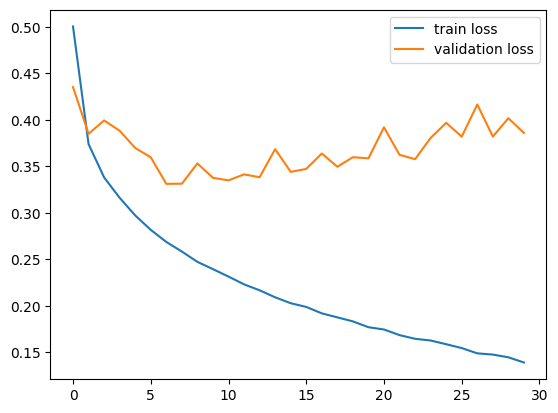

In [ ]:
# training, validation loss 평가
loss1 = hist1.history['loss']
val_loss1 = hist1.history['val_loss']
plt.plot(loss1)
plt.plot(val_loss1)
plt.legend(['train loss', 'validation loss'])
plt.show()

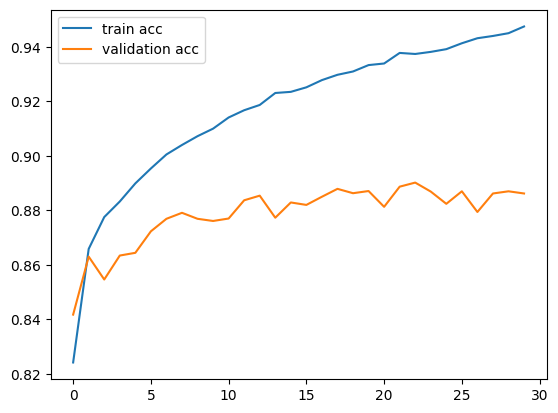

In [ ]:
# training, validation accuracy 평가
acc1 = hist1.history['accuracy']
val_acc1 = hist1.history['val_accuracy']
plt.plot(acc1)
plt.plot(val_acc1)
plt.legend(['train acc', 'validation acc'])
plt.show()

In [ ]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8862
테스트 정확도: 0.8862000107765198




## [결과 분석]
- 에포크에 따른 training, validation loss 값을 시각화한 결과, <br>
  training loss는 약 0.15 이하로 감소하지만, validation loss는 0.4에서 크게 감소하지 못함.. <br>
  -> train과정에서는 loss값이 줄었지만 validation 과정에는 loss 값의 변화가 없는 과소적합상태임을 알 수 있음.

- 에포크에 따른 training, validation accuracy 값을 시각화한 결과, <br>
  training accuracy는 94.5%, validation accuracy는 88.7% 의 정확도를 가짐.<br>
  -> accuracy 또한,training accuracy는 90%를 넘었지만 이에 반해 validation accuracy는 다소 낮게 측정됨.

- test data로 evaluation을 진행한 결과, 88.86% 밖에 정확도가 나오지 않아 hidden layer가 1개인 모델로는 90%이상의 정확도를 얻을 수 없음을 알 수 있음.